# PFI and efPC Visualization (Random forest)

## Compute PFI

In [42]:
set.seed(23020542)
pfi_jfpca <- compute_pfi(
  x = rf_jfpca_df %>% select(-x1),
  y = rf_jfpca_df$x1,
  f = rf_jfpca,
  K = 10,
  metric = "nmse"
)

## PFI results (mean of reps)

=== SIMPLE PFI RESULTS (Random Forest) ===
     PC    PFI_Value
1   PC1 0.0409062104
2   PC2 0.0209996106
3  PC12 0.0008119130
4  PC34 0.0004850682
5  PC50 0.0004337216
6  PC66 0.0004097277
7   PC7 0.0003701995
8  PC45 0.0003582336
9  PC62 0.0003517454
10 PC38 0.0003198865


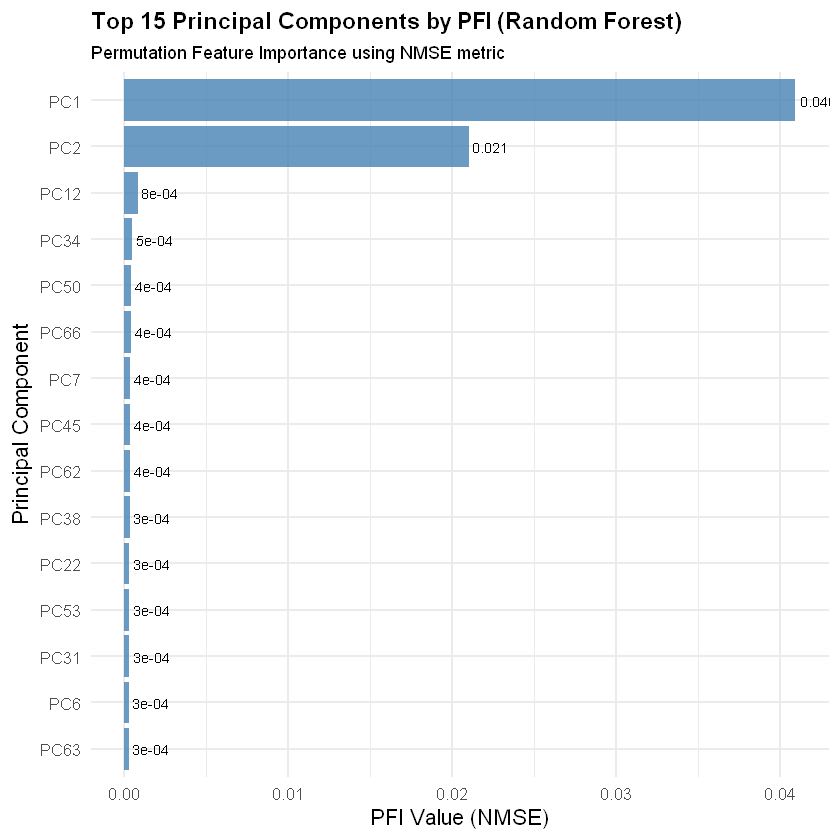

In [60]:
# --- Display basic results ---
cat("=== SIMPLE PFI RESULTS (Random Forest) ===\n")

# Create a PFI summary table
pfi_simple <- data.frame(
  PC = paste0("PC", 1:length(pfi_jfpca$pfi)),  # Principal Component labels
  PFI_Value = pfi_jfpca$pfi                    # Corresponding PFI values
) %>%
  arrange(desc(PFI_Value))  # Sort descending by importance

# Print top 10 most important PCs
print(head(pfi_simple, 10))
cat("==========================================\n")

# --- Visualization: Top 15 PCs by PFI ---
library(ggplot2)

p_simple <- ggplot(head(pfi_simple, 15),
                   aes(x = reorder(PC, PFI_Value), y = PFI_Value)) +
  geom_bar(stat = "identity", fill = "steelblue", alpha = 0.8) +
  geom_text(aes(label = round(PFI_Value, 4)),
            hjust = -0.1, size = 3, color = "black") +
  coord_flip() +
  labs(
    title = "Top 15 Principal Components by PFI (Random Forest)",
    subtitle = "Permutation Feature Importance using NMSE metric",
    x = "Principal Component",
    y = "PFI Value (NMSE)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 11)
  )

# Display plot
print(p_simple)

## Identify the top PC for each elastic fPCA method

In [44]:
top_pc_jfpca <- 
  data.frame(pfi = pfi_jfpca$pfi) %>%
  mutate(pc = 1:n()) %>%
  arrange(desc(pfi)) %>%
  slice(1) %>%
  pull(pc)

## Principal directions of top PC for each jfPCA method

Most important PC from PFI: 1 


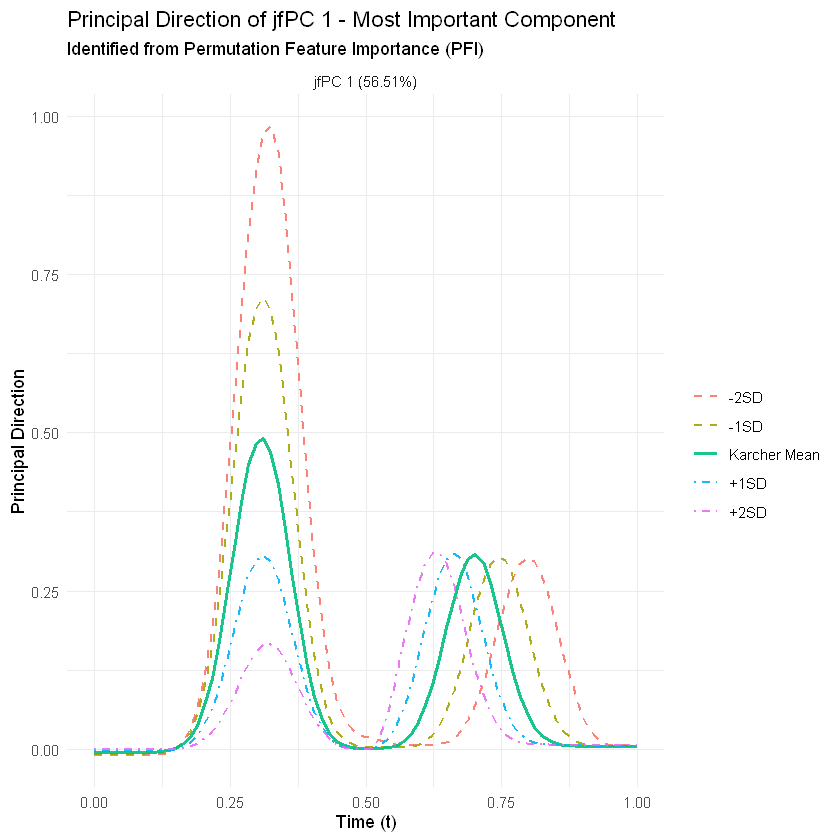

In [45]:
# Plot the principal direction of the most important jfPC (based on PFI results)

# Identify the most important principal component from PFI results
top_pc_jfpca <- which.max(pfi_jfpca$pfi)
cat("Most important PC from PFI:", top_pc_jfpca, "\n")

# Visualize the principal direction of that top PC
plot_pc_directions(
  fpcs = top_pc_jfpca,                     # Plot only the top PC
  fdasrvf = train_transformed_jfpca$fpca_res,  # FPCA results from the training step
  fpca_method = "jfpca",                   # Joint functional PCA method
  times = times,                           # Time or wavelength vector
  digits = 2,                              # Display 2 decimal places for variance %
  nrow = 1,                                # Arrange in a single row
  alpha = 0.9,                             # Line transparency
  linesizes = c(0.6, 0.8, 1.0, 0.8, 0.6)   # Line thickness pattern (thin–thick–thin)
) +
  labs(
    title = paste("Principal Direction of jfPC", top_pc_jfpca, "- Most Important Component"),
    subtitle = "Identified from Permutation Feature Importance (PFI)",
    x = "Time (t)",
    y = "Principal Direction"
  ) +
  theme_minimal()
